In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils.file_picker import pick_image_cv2

# =========================
# 1. Load images
# =========================

# Full wheel frame (target image)
wheel_bgr = cv2.imread("C:\\Users\\Gabriel\\Documents\\Dissertation\\Code\\data\\roulette2.png")

# Template image
template_bgr, template_path = pick_image_cv2(title="Select a template image")

if wheel_bgr is None or template_bgr is None:
    raise ValueError("Check your file paths – one of the images did not load.")

# Convert to grayscale (matchTemplate works well on grayscale)
wheel_gray = cv2.cvtColor(wheel_bgr, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template_bgr, cv2.COLOR_BGR2GRAY)

h, w = template_gray.shape[:2]

print(f"Template size: {w}x{h}")

Template size: 53x53


In [8]:
# =========================
# 2. Run template matching
# =========================

# Common methods: TM_CCOEFF_NORMED, TM_CCORR_NORMED, TM_SQDIFF_NORMED
method = cv2.TM_CCOEFF_NORMED

result = cv2.matchTemplate(wheel_gray, template_gray, method)
print("Result heatmap shape:", result.shape)

# Get best match location
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    best_val = min_val
    best_loc = min_loc
    print(f"Best match (lower is better): {best_val:.4f}")
else:
    best_val = max_val
    best_loc = max_loc
    print(f"Best match (higher is better): {best_val:.4f}")

top_left = best_loc
bottom_right = (top_left[0] + w, top_left[1] + h)


Result heatmap shape: (553, 591)
Best match (higher is better): 0.6816


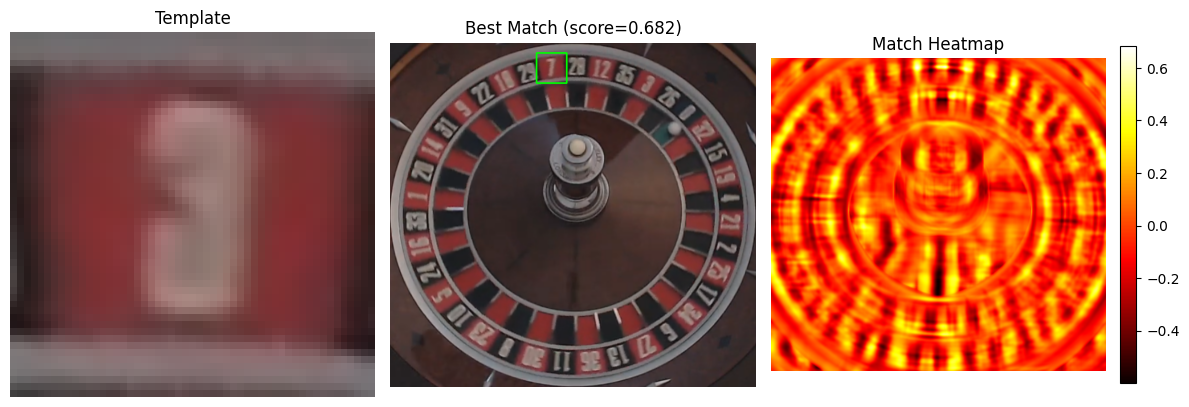

In [9]:
# =========================
# 3. Visualise best match
# =========================

# Draw rectangle on a copy
wheel_vis = wheel_bgr.copy()
cv2.rectangle(wheel_vis, top_left, bottom_right, (0, 255, 0), 2)

# Convert BGR->RGB for matplotlib
wheel_vis_rgb = cv2.cvtColor(wheel_vis, cv2.COLOR_BGR2RGB)
template_rgb = cv2.cvtColor(template_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(template_rgb)
plt.title("Template")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(wheel_vis_rgb)
plt.title(f"Best Match (score={best_val:.3f})")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(result, cmap="hot")
plt.title("Match Heatmap")
plt.colorbar(fraction=0.046, pad=0.04)
plt.axis("off")

plt.tight_layout()
plt.show()

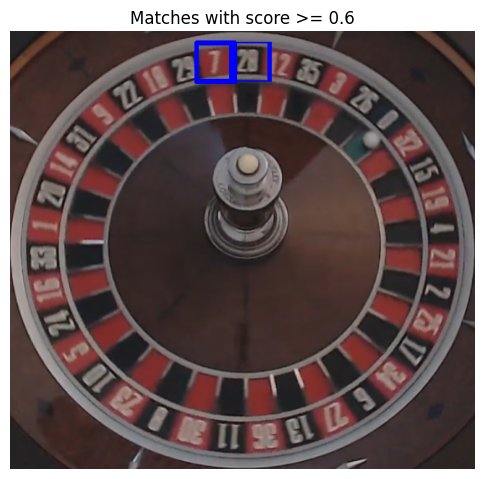

In [10]:
# =========================
# 4. (Optional) Multiple matches above a threshold
# =========================

# Only makes sense for TM_CCOEFF_NORMED / TM_CCORR_NORMED
threshold = 0.6  # tweak this
if method in [cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR_NORMED]:
    loc = np.where(result >= threshold)
    wheel_multi = wheel_bgr.copy()

    for pt_y, pt_x in zip(*loc):  # note: result is (rows, cols) = (y, x)
        top_left_multi = (pt_x, pt_y)
        bottom_right_multi = (pt_x + w, pt_y + h)
        cv2.rectangle(wheel_multi, top_left_multi, bottom_right_multi, (255, 0, 0), 1)

    wheel_multi_rgb = cv2.cvtColor(wheel_multi, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 6))
    plt.imshow(wheel_multi_rgb)
    plt.title(f"Matches with score >= {threshold}")
    plt.axis("off")
    plt.show()